In [ ]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('/content/Telco_Churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**DATA CLEANING**

In [ ]:
#not required
df = df.drop('customerID',axis=1)

In [ ]:
#find the null values created from prev step
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#replace empty string and typecast
df['TotalCharges'] = df['TotalCharges'].replace(" ",np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)
#handle null values using mean
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [ ]:
#numerical variables
num = list(df.select_dtypes(include=['int64','float64']).keys())

#categorical variables
cat = list(df.select_dtypes(include='O').keys())

print(cat)
print(num)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [ ]:
# value_counts of the categorical columns
for i in cat:
    print(df[i].value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV

In [ ]:
#as we see that there is extra categories which we have to convert it into No.
df.MultipleLines = df.MultipleLines.replace('No phone service','No')
df.OnlineSecurity = df.OnlineSecurity.replace('No internet service','No')
df.OnlineBackup = df.OnlineBackup.replace('No internet service','No')
df.DeviceProtection = df.DeviceProtection.replace('No internet service','No')
df.TechSupport = df.TechSupport.replace('No internet service','No')
df.StreamingTV = df.StreamingTV.replace('No internet service','No')
df.StreamingMovies = df.StreamingMovies.replace('No internet service','No')

**DATA EXPLORATION**

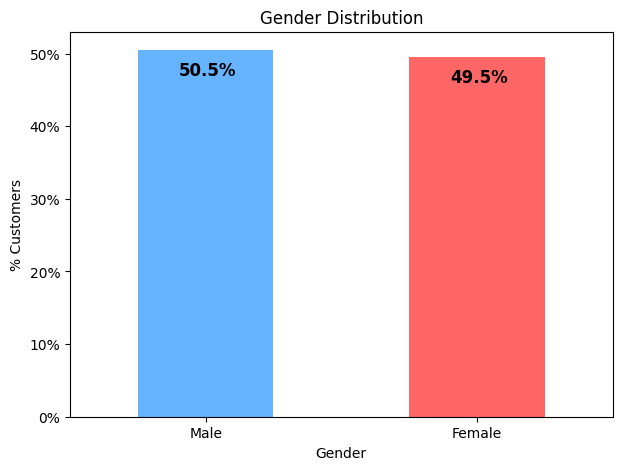

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.figure(figsize=(7, 5))  # Set the figure size to 7 by 5

# Set light blue and pink colors
colors = ['#66b3ff', '#ff6666']

# Plot the gender distribution
ax = (df['gender'].value_counts() * 100.0 / len(df)).plot(kind='bar', stacked=True, rot=0, color=colors)

# Format y-axis as percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Set labels and title
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_title('Gender Distribution')

# Create a list to collect the plt.patches data
totals = []

# Find the values and append to the list
for i in ax.patches:
    totals.append(i.get_width())

# Set individual bar labels using the above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x() + i.get_width() / 2 - 0.1, i.get_height() - 3.5,
            f"{round((i.get_height() / total), 1)}%",
            fontsize=12,
            color='black',  # Adjust the text color here
            weight='bold')

# Show the plot
plt.show()


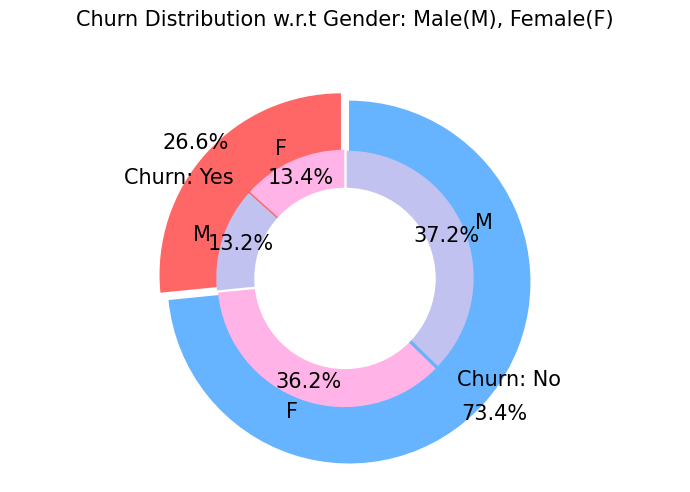

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5))

# Churn data
labels_churn = ["Churn: Yes", "Churn: No"]
values_churn = [1869, 5163]
colors_churn = ['#ff6666', '#66b3ff']
explode_churn = (0.3, 0.3)

# Gender data
labels_gender = ["F", "M", "F", "M"]
sizes_gender = [939, 930, 2544, 2619]
colors_gender = ['#ffb3e6', '#c2c2f0', '#ffb3e6', '#c2c2f0']
explode_gender = (0.1, 0.1, 0.1, 0.1)

textprops = {"fontsize": 15}

# Plot Churn data
plt.pie(values_churn, labels=labels_churn, autopct='%1.1f%%', pctdistance=1.08,
        labeldistance=0.8, colors=colors_churn, startangle=90, frame=True, explode=explode_churn,
        radius=10, textprops=textprops, counterclock=True)

# Plot Gender data
plt.pie(sizes_gender, labels=labels_gender, autopct='%1.1f%%', pctdistance=0.85,
        colors=colors_gender, startangle=90, explode=explode_gender, radius=7, textprops=textprops,
        counterclock=True)

# Draw circle
centre_circle = plt.Circle((0, 0), 5, color='black', fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# Show plot
plt.axis('equal')
plt.tight_layout()
plt.show()


In [ ]:
import plotly.graph_objects as go

labels = df['Churn'].unique()
values = df['Churn'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3,
                             textinfo='percent+text',
                             textposition='inside',
                             insidetextorientation='horizontal',
                             texttemplate='%{percent:.0%} (%{value})'
                            )])

fig.update_layout(title_text="<b>Churn Distribution</b>")
fig.update_layout(width=700, height=500, bargap=0.1)

fig.show()


In [ ]:
import plotly.express as px

fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customer Contract Distribution<b>")

# Calculate percentage values
percentage_values = (df.groupby(['Contract', 'Churn']).size() / df.groupby('Contract').size() * 100).round(1)

fig.update_traces(text=percentage_values.astype(str) + '% (' + df.groupby(['Contract', 'Churn']).size().astype(str) + ')',
                  textposition='inside',
                  texttemplate='%{text}',
                  hoverinfo='text',
                  textangle=0,  # Set text angle to horizontal
                  textfont=dict(size=26)  # Adjust text size
                 )

fig.update_layout(width=700, height=500, bargap=0.05)  # Adjust bargap to control text size

fig.show()


<ipython-input-967-09ab2b586f05>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




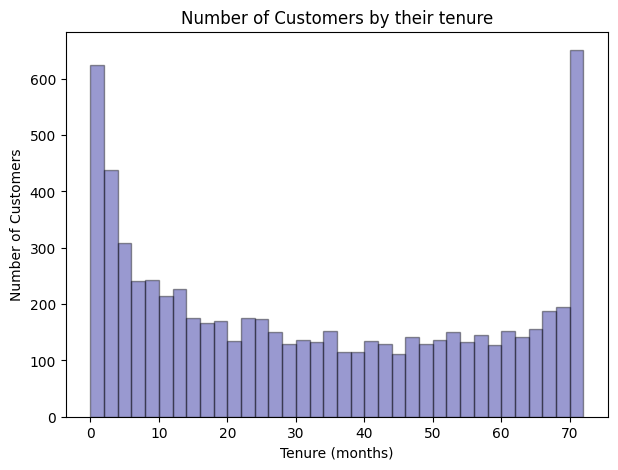

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))  # Set the figure size to 7 by 5

ax = sns.distplot(df['tenure'], hist=True, kde=False,
                  bins=int(180/5), color='darkblue',
                  hist_kws={'edgecolor': 'black'},
                  kde_kws={'linewidth': 4})

ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Number of Customers by their tenure')

plt.show()


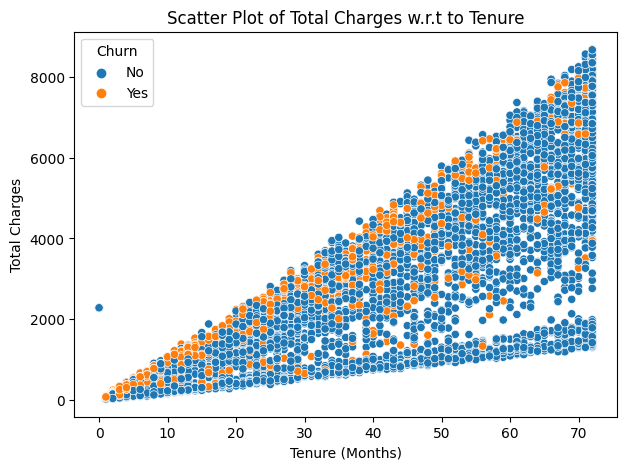

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

sns.scatterplot(x=df['tenure'], y=df['TotalCharges'], hue=df['Churn'])

# Set plot labels and title
plt.xlabel('Tenure (Months)')
plt.ylabel('Total Charges')
plt.title('Scatter Plot of Total Charges w.r.t to Tenure')

# Show the plot
plt.show()


**DATA PREPROCESSING**

In [ ]:
#encoding
label_encoder = LabelEncoder()
for i in cat:
  df[i] = label_encoder.fit_transform(df[i])

df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
#scaling
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,0.0,0.013889,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423,0.001275,0.0
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075,0.215867,0.0
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229,0.010310,1.0
3,1.0,0.0,0.0,0.0,0.625000,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.239303,0.210241,0.0
4,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891,0.015330,1.0


In [ ]:
# independent and dependent variables
x = df.drop('Churn',axis=1)
y = df['Churn']
print(x.shape)
print(y.shape)
y.value_counts()

(7043, 19)
(7043,)


0.0    5174
1.0    1869
Name: Churn, dtype: int64

In [ ]:
#sampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x, y = smote.fit_resample(x, y)
print(x.shape)
print(y.shape)
y.value_counts()

(10348, 19)
(10348,)


0.0    5174
1.0    5174
Name: Churn, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
#splitting
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 24)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(8278, 19) (2070, 19)
(8278,) (2070,)


In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(19,), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')
])



In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 64)                1280      
                                                                 
 dropout_78 (Dropout)        (None, 64)                0         
                                                                 
 dense_121 (Dense)           (None, 16)                1040      
                                                                 
 dropout_79 (Dropout)        (None, 16)                0         
                                                                 
 dense_122 (Dense)           (None, 32)                544       
                                                                 
 dropout_80 (Dropout)        (None, 32)                0         
                                                                 
 dense_123 (Dense)           (None, 1)               

In [ ]:
# Train the model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=24, restore_best_weights=True)

history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=100,
    verbose=1,
    validation_split=0.1,
    callbacks=[early_stopping],
)

Epoch 1/100
233/233 [==============================] - 3s 5ms/step - loss: 0.6729 - accuracy: 0.6616 - val_loss: 0.5516 - val_accuracy: 0.7621
Epoch 2/100
233/233 [==============================] - 1s 4ms/step - loss: 0.5769 - accuracy: 0.7467 - val_loss: 0.5265 - val_accuracy: 0.7778
Epoch 3/100
233/233 [==============================] - 1s 4ms/step - loss: 0.5540 - accuracy: 0.7546 - val_loss: 0.5093 - val_accuracy: 0.7790
Epoch 4/100
233/233 [==============================] - 1s 3ms/step - loss: 0.5408 - accuracy: 0.7617 - val_loss: 0.5047 - val_accuracy: 0.7729
Epoch 5/100
233/233 [==============================] - 1s 3ms/step - loss: 0.5314 - accuracy: 0.7651 - val_loss: 0.4962 - val_accuracy: 0.7778
Epoch 6/100
233/233 [==============================] - 1s 3ms/step - loss: 0.5210 - accuracy: 0.7698 - val_loss: 0.4907 - val_accuracy: 0.7766
Epoch 7/100
233/233 [==============================] - 1s 3ms/step - loss: 0.5151 - accuracy: 0.7710 - val_loss: 0.4915 - val_accuracy: 0.7754

**RESULTS**

In [ ]:
#classification report
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test)
threshold = 0.5
y_pred = np.where(y_pred >= threshold, 1, 0)
print(classification_report(y_test, y_pred))

65/65 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.84      0.76      0.80      1040
         1.0       0.78      0.85      0.81      1030

    accuracy                           0.81      2070
   macro avg       0.81      0.81      0.81      2070
weighted avg       0.81      0.81      0.81      2070



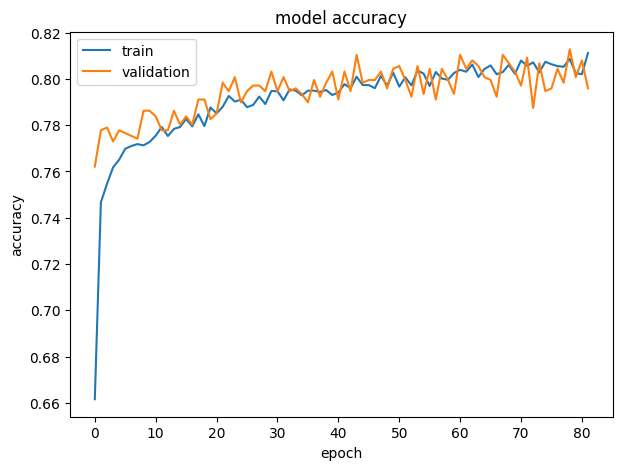

In [ ]:
# summarize history for accuracy (accuracy curve)
plt.figure(figsize=(7, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

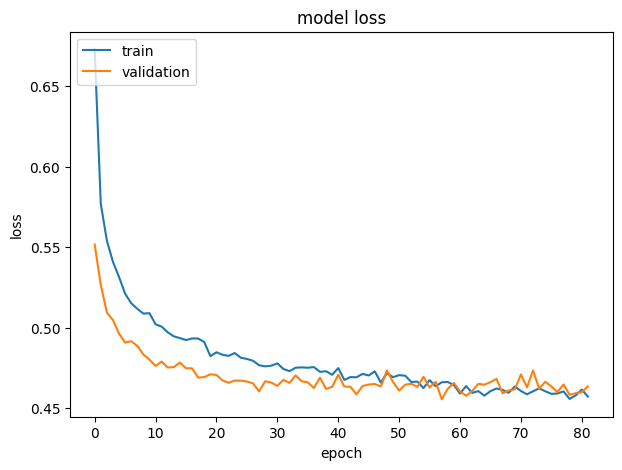

In [ ]:
# summarize history for loss (loss curve)
plt.figure(figsize=(7, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

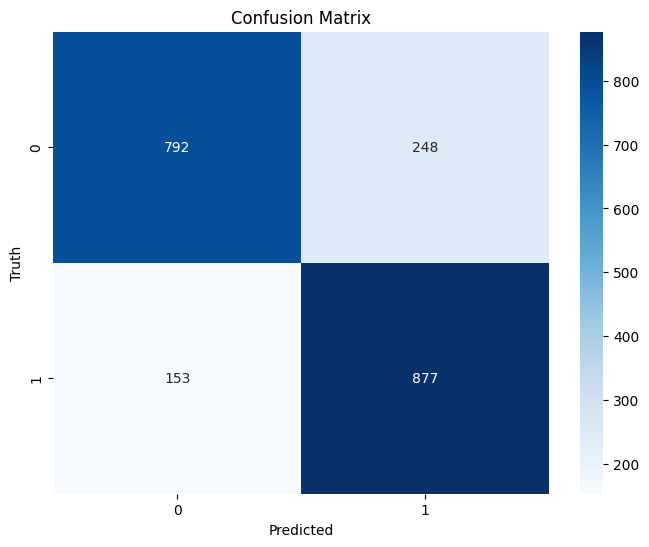

In [ ]:
# Create confusion matrix
plt.figure(figsize=(8, 6))
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

# Set a custom color palette using blue shades
cmap = "Blues"
# Plotting the confusion matrix with Seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap)

# Adding labels and title
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


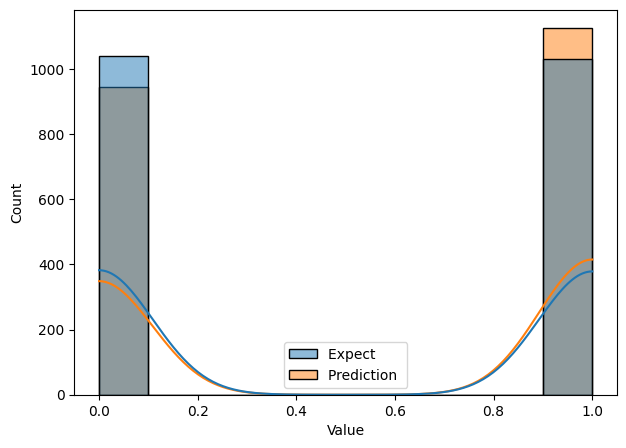

In [ ]:
import seaborn as sns
actual = np.array(y_test)
predicted = np.where(y_pred >= threshold, 1, 0)
df = pd.DataFrame({'Expect ': actual.flatten(), 'Prediction ': predicted.flatten()})
plt.figure(figsize=(7, 5))
sns.histplot(data=df, bins=10, kde=True)
plt.xlabel('Value')
plt.ylabel('Count')

plt.show()